In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
def replace_color(img,
        old_color=(0, 0, 0), new_color=(255, 255, 255)):
    img[np.all(img == old_color, axis=-1)] = new_color

    return img

def plot_image(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    plt.imshow(img)
    plt.axis('off')
    plt.show()
def doDistortion(basic_image, arr):
    rows, cols = basic_image.shape[:2]
    xi, yi = np.meshgrid(np.arange(cols), np.arange(rows))
    xmid = cols/2.0
    ymid = rows/2.0
    xi = xi - xmid
    yi = yi - ymid
    r, theta = cv.cartToPolar(xi/xmid, yi/ymid)
    start_degree = 3
    for i in arr:
        r += i * r ** (start_degree)
        start_degree+=2
    u, v = cv.polarToCart(r, theta)
    u = u * xmid + xmid
    v = v * ymid + ymid
    I_new = cv.remap(basic_image, u.astype(np.float32),
                        v.astype(np.float32), cv.INTER_LINEAR)
    return I_new


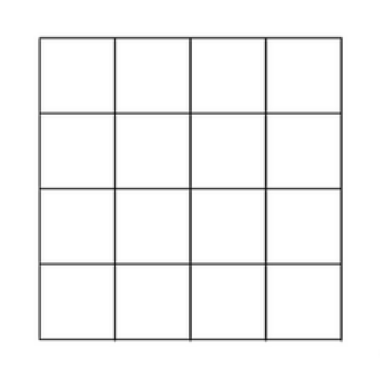

In [4]:
basic_image = cv.imread('standart.png')
basic_image = replace_color(basic_image)
plot_image(basic_image)

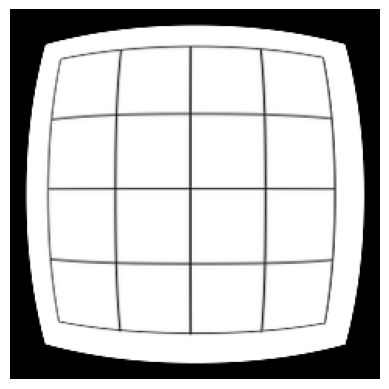

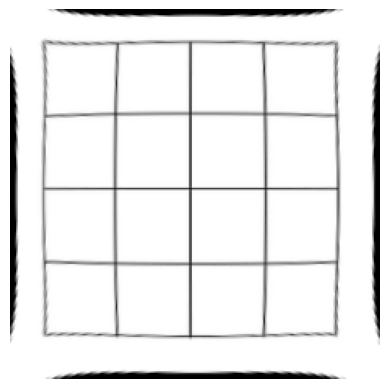

In [5]:
img_barrel = doDistortion(basic_image,[0.01, 0.12])
plot_image(img_barrel)

img_correct = doDistortion(img_barrel,[-0.015, -0.024, -0.032])
plot_image(img_correct)

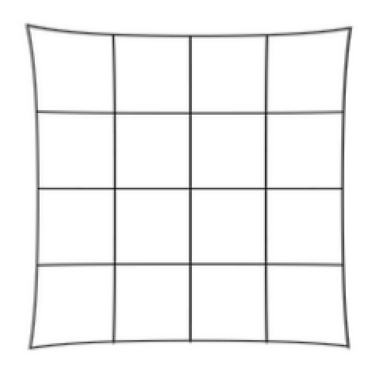

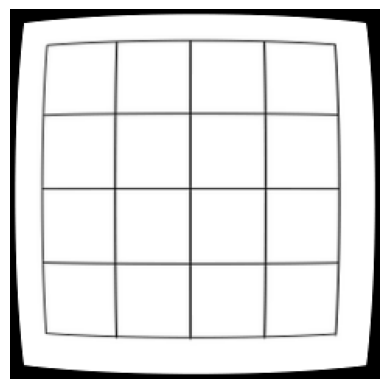

In [6]:
img_pillow = doDistortion(basic_image,[-0.003,-0.009,-0.012])
plot_image(img_pillow)

img_correct = doDistortion(basic_image, [0.01,0.02])
plot_image(img_correct)

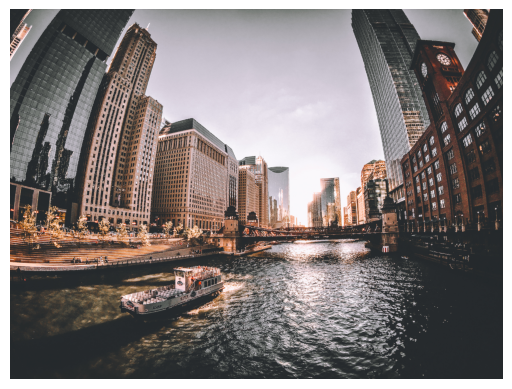

In [7]:
basic_image = cv.imread('city.png')
basic_image = replace_color(basic_image)
plot_image(basic_image)

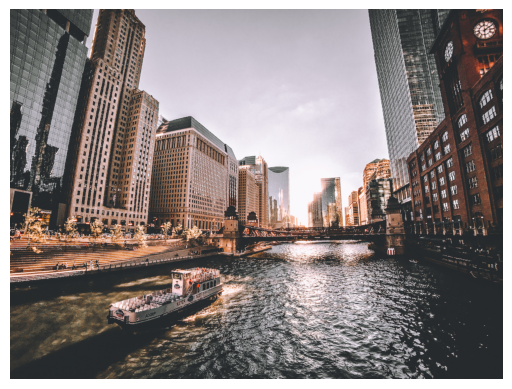

In [100]:
img_correct = doDistortion(basic_image,[-0.1,-0.003,-0.003,-0.003,-0.003])
plot_image(img_correct)

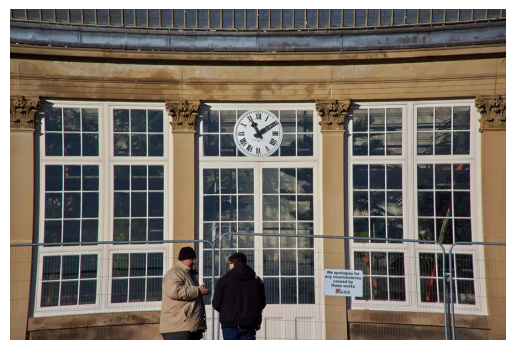

In [101]:
basic_image = cv.imread('twoSexyMen.png')
basic_image = replace_color(basic_image)
plot_image(basic_image)

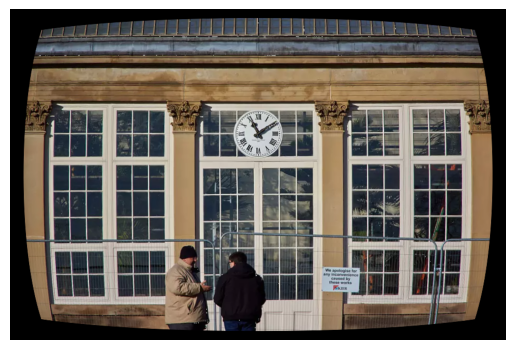

In [110]:
img_correct = doDistortion(basic_image,[0.05,0.006,0.007])
plot_image(img_correct)